# Exploratory Data Analysis 
Tahapannya antara lain:
1. Data Preprocessing
    - Data Cleaning
    - Data Manipulating
    - Data Wrangling
2. Descriptive Statistics
3. Data Visualization
4. Insight & Story Telling

## Data Preprocessing

In [91]:
# Import Packages
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
df_data = pd.read_csv('asset/data.csv', encoding='latin-1')
df_data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [4]:
df_data.columns

Index(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong'],
      dtype='object')

### Data Cleaning

In [5]:
df_data.dtypes

Tweet            object
HS                int64
Abusive           int64
HS_Individual     int64
HS_Group          int64
HS_Religion       int64
HS_Race           int64
HS_Physical       int64
HS_Gender         int64
HS_Other          int64
HS_Weak           int64
HS_Moderate       int64
HS_Strong         int64
dtype: object

In [6]:
df_data.isnull().any()

Tweet            False
HS               False
Abusive          False
HS_Individual    False
HS_Group         False
HS_Religion      False
HS_Race          False
HS_Physical      False
HS_Gender        False
HS_Other         False
HS_Weak          False
HS_Moderate      False
HS_Strong        False
dtype: bool

In [7]:
df_data[df_data.duplicated(keep=False)]

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
33,"RT USER: Kelakuan homok jaman now, ngentot aja...",0,1,0,0,0,0,0,0,0,0,0,0
43,#GubernurZamanNow #GusIpulPuti2 #GanjarYasin1 ...,0,0,0,0,0,0,0,0,0,0,0,0
165,Giat Bhabinkamtibmas Brigpol Mbs Sihombing pd ...,0,0,0,0,0,0,0,0,0,0,0,0
182,USER USER USER USER USER USER USER USER USER U...,0,0,0,0,0,0,0,0,0,0,0,0
239,Monyet Turun ke Pemukiman Warga Cibadak Sukabu...,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12793,I added a video to a USER playlist,0,0,0,0,0,0,0,0,0,0,0,0
12952,USER USER USER USER USER USER USER USER USER U...,0,0,0,0,0,0,0,0,0,0,0,0
12953,"SETUJU SAYA,KLAU AHOK DAPAT GELAR SANTRI KEHOR...",1,1,1,0,0,0,0,0,1,1,0,0
12985,USER ahmad dhani yang terhormat paling babi pa...,1,1,1,0,0,0,0,1,0,1,0,0


In [8]:
df_data.drop_duplicates(inplace=True)

In [9]:
df_data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [10]:
df_data[df_data.duplicated(keep=False)]

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong


In [11]:
df_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HS,13044.0,0.423030,0.494059,0.0,0.0,0.0,1.0,1.0
Abusive,13044.0,0.383701,0.486305,0.0,0.0,0.0,1.0,1.0
HS_Individual,13044.0,0.271389,0.444693,0.0,0.0,0.0,1.0,1.0
HS_Group,13044.0,0.151641,0.358686,0.0,0.0,0.0,0.0,1.0
HS_Religion,13044.0,0.060488,0.238397,0.0,0.0,0.0,0.0,1.0
HS_Race,13044.0,0.043162,0.203229,0.0,0.0,0.0,0.0,1.0
HS_Physical,13044.0,0.024686,0.155171,0.0,0.0,0.0,0.0,1.0
HS_Gender,13044.0,0.023306,0.150879,0.0,0.0,0.0,0.0,1.0
HS_Other,13044.0,0.284115,0.451009,0.0,0.0,0.0,1.0,1.0
HS_Weak,13044.0,0.256670,0.436812,0.0,0.0,0.0,1.0,1.0


In [12]:
df_data.isnull().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [18]:
# import data kamusalay
df_alay = pd.read_csv('asset/new_kamusalay.csv', encoding='latin-1', header=None)
df_alay.head()

,0,1
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [43]:
def text_cleansing(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    text = re.sub(r'(user|rt|retweet|\\t|\\r)', '', text)
    text = re.sub(r"\s+", " ", text)
    text = text.lstrip().rstrip() 
    text = re.sub(r'(https|https:|url)', '', text)
    text = re.sub(r'#([^\s]+)', '', text)
    text = re.sub(r'@[^\s]+', '', text)
    text = re.sub(r'\\[a-z0-9]{1,5}', '', text)
    text = re.sub(r'[^\x00-\x7f]', '', text)
    text = re.sub(r'(\\u[0-9A-Fa-f]+)', '', text)
    text = re.sub(r'\b\w{1,3}\b', '', text)

    return text

In [44]:
df_data['cleaned_tweet'] = df_data['Tweet'].apply(text_cleansing)
df_data[['cleaned_tweet']]

,cleaned_tweet
0,disaat semua cowok berusaha melacak perhatian ...
1,siapa yang telat ngasih edan sarap bergaul ...
2,kadang berfikir kenapa tetap percaya pada t...
3,matamu sipit tapi diliat dari mana
4,kaum cebong kapir udah keliatan dongoknya dari...
...,...
13164,jangan asal ngomong ndasmu congor sekate2 an...
13165,kasur mana enak kunyuk
13166,hati hati bisu nlagi bosan huft
13167,yang real mudah terdeteksi yang terkubur sua...


In [45]:
df_data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,cleaned_tweet
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,disaat semua cowok berusaha melacak perhatian ...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat ngasih edan sarap bergaul ...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,kadang berfikir kenapa tetap percaya pada t...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,matamu sipit tapi diliat dari mana
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kapir udah keliatan dongoknya dari...


In [61]:
dictionary = dict(zip(df_alay[0], df_alay[1]))
df_data['cleaned_tweet'] = df_data['cleaned_tweet'].apply(lambda x: " ".join([dictionary.get(w, w) for w in x.split()]))
df_data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,cleaned_tweet
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,di saat semua cowok berusaha melacak perhatian...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat memberi edan sarap bergaul de...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,kadang berpikir kenapa tetap percaya pada tuha...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,matamu sipit tapi dilihat dari mana
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir sudah kelihatan dongoknya da...


In [133]:
# search for word in cleaned_tweet
df_data[df_data['Tweet'].str.contains('nmaaf')]

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,cleaned_tweet,tweet_tokenized,tweet_without_stopwords,tweet_abusive_without_stopwords
2348,RT USER: USER jawab aja\n\nkak lo org nya asik...,0,1,0,0,0,0,0,0,0,0,0,0,jawab kakak asyik sayang omongannya kayak gobl...,"[jawab, kakak, asyik, sayang, omongannya, kaya...",kakak asyik sayang omongannya goblok ilfeel ma...,goblok


In [134]:
df_data['Tweet'][2348]

"RT USER: USER jawab aja\\n\\nkak lo org nya asik\\ntp sayang omongannya kaya org goblok,jd bikin ilfeel\\nmaaf ya\\ngausah kebanyakan ng\\xe2\\x80\\xa6'"

In [135]:
df_data['cleaned_tweet'][2348]

'jawab kakak asyik sayang omongannya kayak goblok bikin ilfeel maaf  usah kebanyakan'

In [103]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.corpus.stopwords.words('indonesian')

df_data['tweet_tokenized'] = df_data['cleaned_tweet'].apply(lambda x: word_tokenize(x))

stop_words = stopwords.words("indonesian")
more_stopword = ['orang','gitu', 'pake', 'sampe', 'cuma', 'dengan', 'ia','bahwa','oleh', 'udah']
stop_words.extend(more_stopword)

df_data['tweet_without_stopwords'] = df_data['tweet_tokenized'].apply(lambda x: ' '.join([word for word in x if word not in stop_words]))

[nltk_data] Downloading package stopwords to C:\Users\Fahmi
[nltk_data]     Indra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Fahmi
[nltk_data]     Indra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


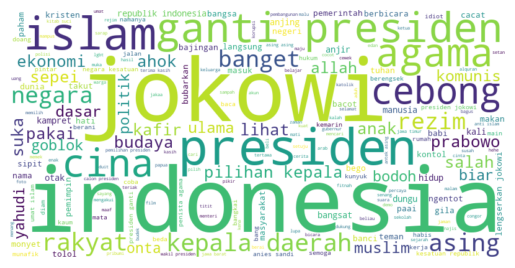

In [104]:
text = ' '.join(df_data['tweet_without_stopwords'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[('presiden', 1497), ('indonesia', 1121), ('jokowi', 1091), ('islam', 836), ('agama', 750), ('asing', 652), ('2019', 627), ('cina', 605), ('cebong', 547), ('negara', 524), ('ganti', 501), ('rakyat', 479), ('daerah', 457), ('gubernur', 445), ('kepala', 435), ('kristen', 379), ('komunis', 374), ('kafir', 370), ('ahok', 368), ('rezim', 365), ('ulama', 349), ('pilihan', 341), ('anak', 336), ('allah', 333), ('pakai', 330), ('ekonomi', 324), ('prabowo', 320), ('budaya', 304), ('banget', 303), ('2018', 281), ('jawa', 279), ('suka', 278), ('salah', 273), ('antek', 270), ('muslim', 270), ('kerja', 262), ('anti', 256), ('katolik', 251), ('pemerintah', 249), ('dungu', 248), ('lihat', 237), ('manusia', 234), ('onta', 232), ('calon', 231), ('sepei', 229), ('politik', 227), ('goblok', 227), ('dasar', 225), ('yahudi', 216), ('kampret', 213), ('nusantara', 213), ('umat', 207), ('anjing', 204), ('hati', 201), ('babi', 200), ('kasih', 195), ('anies', 195), ('pemilihan', 192), ('biar', 192), ('kontol', 1

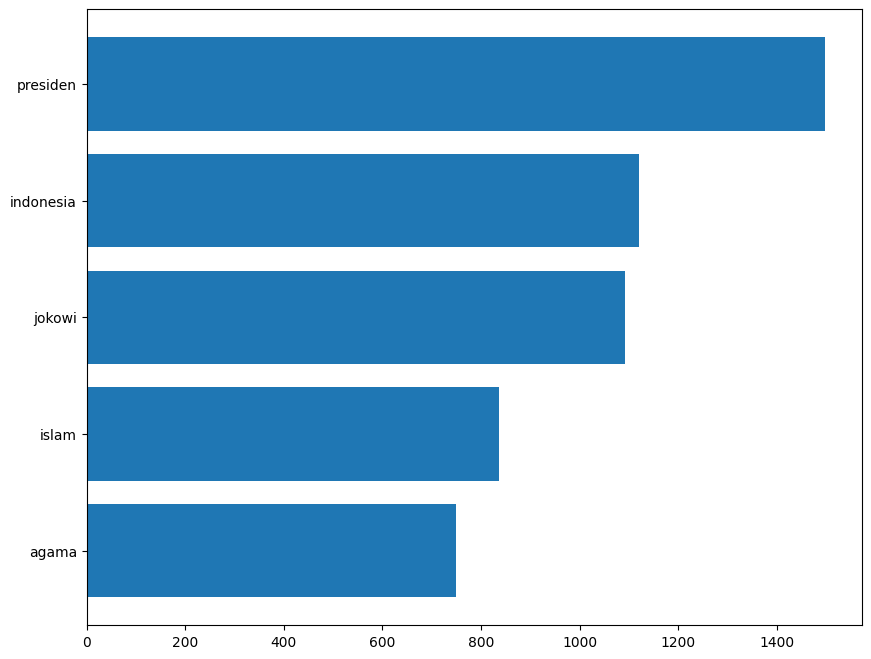

In [120]:
text = ' '.join(df_data['tweet_without_stopwords'].to_list())
freq_kata = nltk.FreqDist(nltk.word_tokenize(text))
print(freq_kata.most_common(100))

# make bar chart for freq_kata
df_freq_kata = pd.DataFrame(freq_kata.most_common(5), columns=['Kata', 'Jumlah'])
df_freq_kata

plt.figure(figsize=(10, 8))
plt.barh(df_freq_kata['Kata'], df_freq_kata['Jumlah'])
plt.gca().invert_yaxis()
plt.show()

In [110]:
df_abusive = pd.read_csv('asset/abusive.csv', encoding='latin-1')
df_abusive

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing
...,...
120,rezim
121,sange
122,serbet
123,sipit


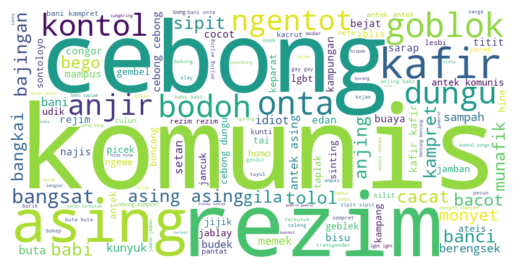

In [113]:
# filter abusive words
abusive_words = df_abusive['ABUSIVE'].to_list()
df_data['tweet_abusive_without_stopwords'] = df_data['tweet_without_stopwords'].apply(lambda x: ' '.join([word for word in x.split() if word in abusive_words]))
text = ' '.join(df_data['tweet_abusive_without_stopwords'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

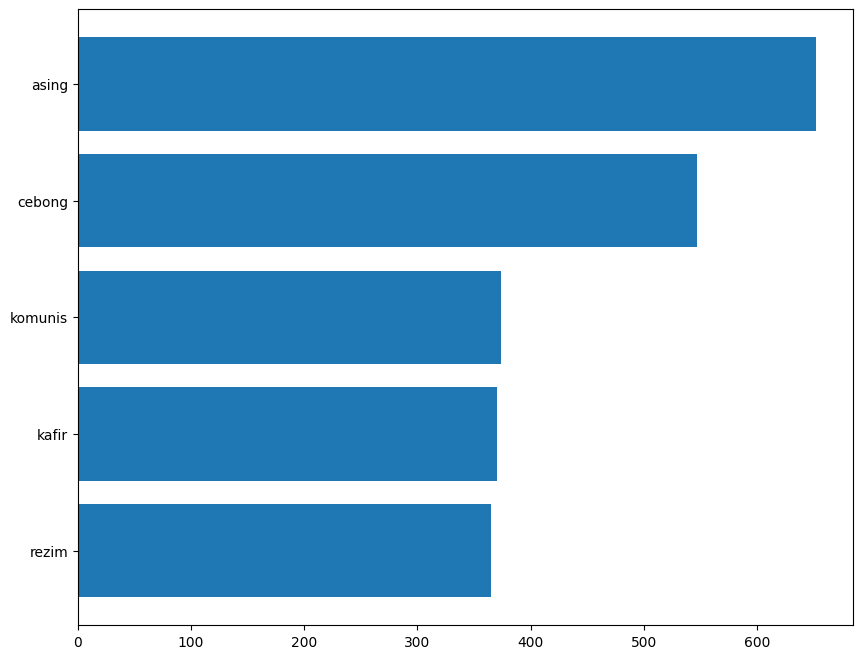

In [121]:
text = ' '.join(df_data['tweet_abusive_without_stopwords'].to_list())
freq_kata = nltk.FreqDist(nltk.word_tokenize(text))
freq_kata

# make bar chart for freq_kata
df_freq_kata = pd.DataFrame(freq_kata.most_common(5), columns=['Kata', 'Jumlah'])
df_freq_kata

plt.figure(figsize=(10, 8))
plt.barh(df_freq_kata['Kata'], df_freq_kata['Jumlah'])
plt.gca().invert_yaxis()
plt.show()